In [1]:
from ase.io.cube import read_cube_data, read_cube
from cmcrameri import cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from pymatgen.io.ase import AseAtomsAdaptor

This book plots Fig 6. from the main paper.
First we load the guassian cube file of the calculated 3D density.

In [2]:
cube = read_cube_data('F_density.cube')
density = cube[0]

Then we take slices through the material at each of fluorine crystalographic planes.

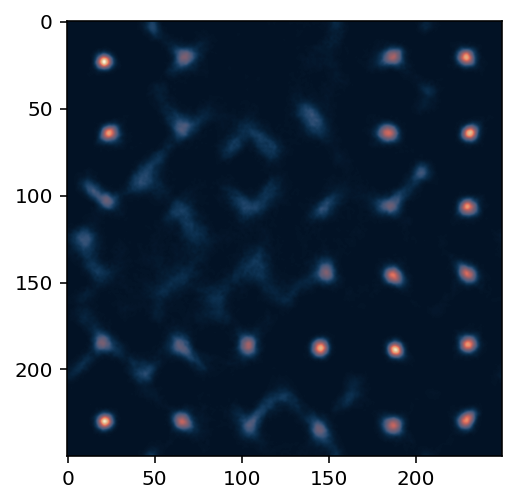

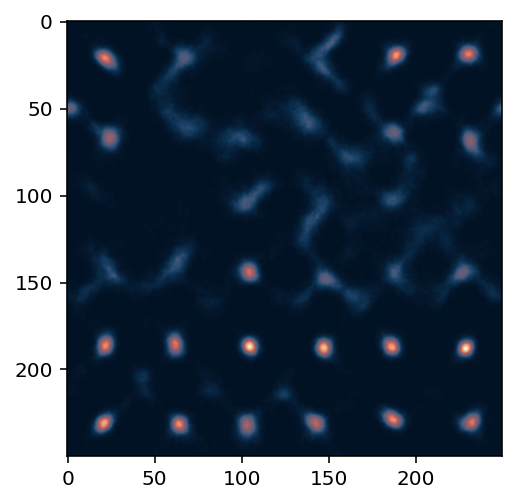

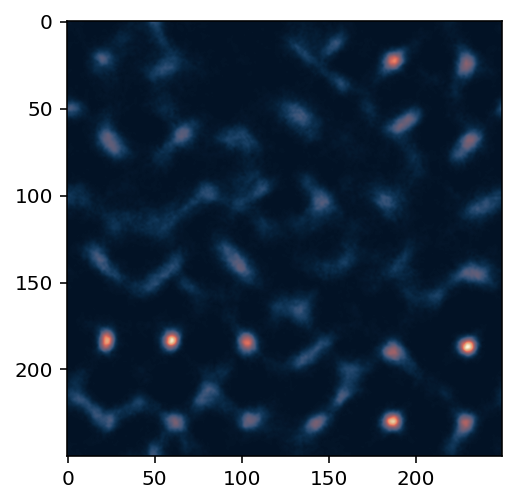

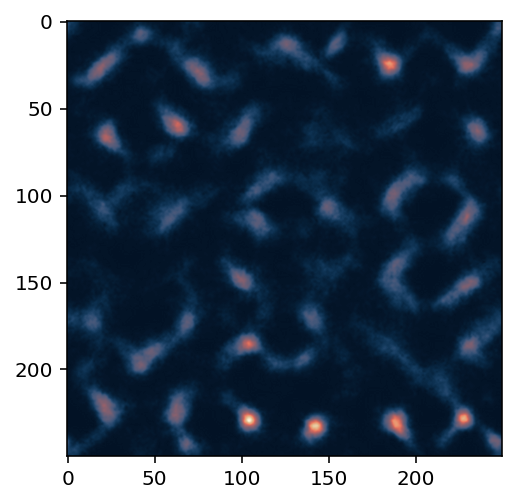

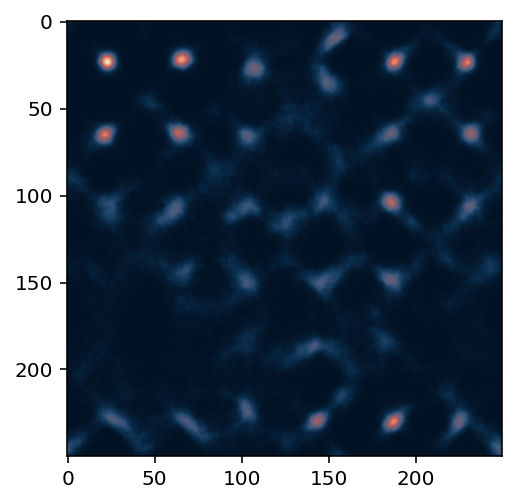

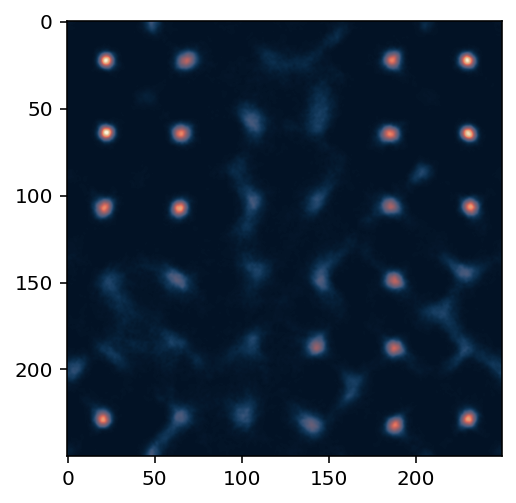

In [3]:
offset = 1
for s in range(6):
    plt.imshow(np.sum(density[int(250/6*s):int(250/6*(s+1))+offset], axis=0).T, cmap=cm.lipari, interpolation='lanczos')
    plt.show()

For ease of manipulation we take the ase atoms structure from the cube file and convert it to a pymatgen structure object.

In [4]:
structure = AseAtomsAdaptor.get_structure(cube[1])

Finally we replot the first map from above with the coordinating barium and tin atoms added as squares

In [5]:
colours = {'Ba': 'grey',
           'Sn': 'grey'}

s = 1
scaling = 250/6

plt.imshow(np.sum(density[int(250/6*s):int(250/6*(s+1))+offset], axis=0).T, cmap=cm.lipari, interpolation='lanczos')

for site in structure:
    x, y, z = np.mod(np.rint(site.frac_coords*6), 6).astype(int)
    for s1 in [0,6]:
        for s2 in [0,6]:
            if x in [s,s+1]:
                if site.species_string == 'Ba':
                    plt.plot((y+s1)*scaling, (z+s2)*scaling, 's', color=colours[site.species_string],
                             alpha=0.3, markersize=23, markeredgewidth=0)
                else:
                    plt.plot((y+s1)*scaling, (z+s2)*scaling, 's', color=colours[site.species_string],
                             alpha=0.5, markersize=23, markerfacecolor='none', markeredgewidth=0.4)

plt.xlim([0,250])
plt.ylim([0,250])
plt.axis('off')
plt.savefig('F_surface.pdf', dpi=300)
